Load & Clean the Raw Text

In [2]:
import re

def load_and_clean_text(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read()

    # Remove Project Gutenberg-style headers and footers (optional)
    text = re.sub(r'^\s*.*START OF.*?\n', '', text, flags=re.DOTALL)
    text = re.sub(r'\n.*END OF.*$', '', text, flags=re.DOTALL)

    # Remove non-alphabetic characters, digits, and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)

    return text.lower()  # Normalize to lowercase

Tokenize Sentences and Words

In [3]:
def tokenize_text(text):
    return text.split()

In [4]:
basic_stopwords = set("""
a about above after again against all am an and any are as at be because been before being below between both
but by could did do does doing down during each few for from further had has have having he her here hers herself
him himself his how i if in into is it its itself just me more most my myself no nor not of off on once only or
other ought our ours ourselves out over own same she should so some such than that the their theirs them
themselves then there these they this those through to too under until up very was we were what when where
which while who whom why will with you your yours yourself yourselves
""".split())

def preprocess(filepath):
    raw = load_and_clean_text(filepath)
    tokens = raw.split()
    filtered_tokens = [word for word in tokens if word not in basic_stopwords]
    return filtered_tokens

In [5]:
tokens_awakening = preprocess("data/EN_1899_Chopin,Kate_TheAwakening_Novel.txt")
print(tokens_awakening[:100])  # preview first 100 tokens

['green', 'yellow', 'parrot', 'hung', 'cage', 'outside', 'door', 'kept', 'repeating', 'allez', 'vousen', 'allez', 'vousen', 'sapristi', 'thats', 'right', 'speak', 'little', 'spanish', 'also', 'language', 'nobody', 'understood', 'unless', 'mockingbird', 'hung', 'side', 'door', 'whistling', 'fluty', 'notes', 'upon', 'breeze', 'maddening', 'persistence', 'mr', 'pontellier', 'unable', 'read', 'newspaper', 'degree', 'comfort', 'arose', 'expression', 'exclamation', 'disgust', 'walked', 'gallery', 'across', 'narrow', 'bridges', 'connected', 'lebrun', 'cottages', 'one', 'seated', 'door', 'main', 'house', 'parrot', 'mockingbird', 'property', 'madame', 'lebrun', 'right', 'make', 'noise', 'wished', 'mr', 'pontellier', 'privilege', 'quitting', 'society', 'ceased', 'entertaining', 'stopped', 'door', 'cottage', 'fourth', 'one', 'main', 'building', 'next', 'last', 'seating', 'wicker', 'rocker', 'applied', 'task', 'reading', 'newspaper', 'day', 'sunday', 'paper', 'day', 'old', 'sunday', 'papers', 'yet

In [7]:
#Counts how offten each token appears
from collections import Counter
token_counts = Counter(tokens_awakening)
print(token_counts.most_common())  # print the 10 most common tokens

[('edna', 286), ('one', 194), ('upon', 190), ('pontellier', 179), ('would', 163), ('little', 148), ('robert', 148), ('mrs', 145), ('said', 143), ('madame', 126), ('like', 123), ('went', 112), ('mr', 96), ('away', 91), ('never', 91), ('back', 90), ('go', 88), ('mademoiselle', 86), ('dont', 85), ('ratignolle', 81), ('come', 76), ('time', 74), ('know', 74), ('house', 72), ('see', 72), ('way', 71), ('eyes', 69), ('thought', 69), ('old', 67), ('children', 65), ('well', 65), ('day', 64), ('asked', 64), ('might', 64), ('think', 63), ('woman', 62), ('two', 61), ('face', 61), ('room', 61), ('arobin', 61), ('good', 58), ('hand', 58), ('left', 58), ('looked', 56), ('night', 56), ('came', 55), ('let', 53), ('felt', 52), ('alone', 52), ('seemed', 51), ('long', 49), ('nothing', 49), ('oh', 49), ('husband', 48), ('say', 48), ('going', 48), ('head', 46), ('home', 46), ('table', 46), ('lebrun', 45), ('sat', 45), ('take', 44), ('dinner', 44), ('looking', 43), ('made', 43), ('things', 43), ('always', 42)

In [18]:
sections = [chapter.split('chapter') for chapter in tokens_awakening]

print(f"Number of chapters: {len(sections)}")
print(f"Number of tokens in each chapter: {sections}")
target_words = ['awakening', 'edna', 'robert', 'leonce', 'madame', 'ratignolle']
word_trend = {word: [section.count(word) for section in sections] for word in target_words}
print(word_trend)

Number of chapters: 24193
Number of tokens in each chapter: [['green'], ['yellow'], ['parrot'], ['hung'], ['cage'], ['outside'], ['door'], ['kept'], ['repeating'], ['allez'], ['vousen'], ['allez'], ['vousen'], ['sapristi'], ['thats'], ['right'], ['speak'], ['little'], ['spanish'], ['also'], ['language'], ['nobody'], ['understood'], ['unless'], ['mockingbird'], ['hung'], ['side'], ['door'], ['whistling'], ['fluty'], ['notes'], ['upon'], ['breeze'], ['maddening'], ['persistence'], ['mr'], ['pontellier'], ['unable'], ['read'], ['newspaper'], ['degree'], ['comfort'], ['arose'], ['expression'], ['exclamation'], ['disgust'], ['walked'], ['gallery'], ['across'], ['narrow'], ['bridges'], ['connected'], ['lebrun'], ['cottages'], ['one'], ['seated'], ['door'], ['main'], ['house'], ['parrot'], ['mockingbird'], ['property'], ['madame'], ['lebrun'], ['right'], ['make'], ['noise'], ['wished'], ['mr'], ['pontellier'], ['privilege'], ['quitting'], ['society'], ['ceased'], ['entertaining'], ['stopped']

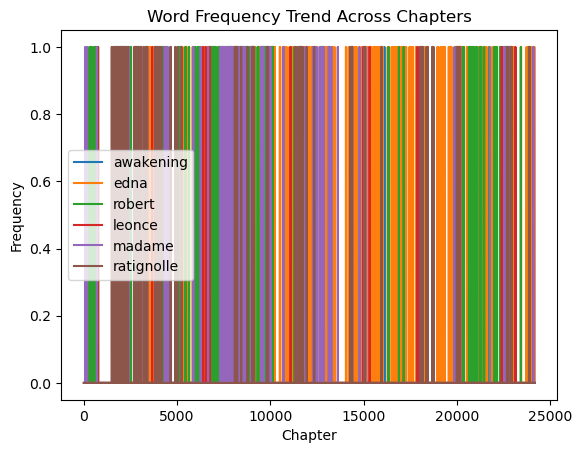

In [20]:
import matplotlib.pyplot as plt

for word, counts in word_trend.items():
    plt.plot(counts, label=word)

plt.legend()
plt.title('Word Frequency Trend Across Chapters')
plt.xlabel('Chapter')
plt.ylabel('Frequency') 
plt.show()